In [28]:
import numpy as np 
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import altair as alt


from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
%matplotlib inline 


from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.simplefilter("ignore")

df=pd.read_csv('vax_tweets_sentiment.csv')

In [29]:
df

,Unnamed: 0,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,sentiment,orig_text
0,0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0.0,False,negative,Same folks said daikon paste could treat a cyt...
1,1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1.0,False,positive,While the world has been on the wrong side of ...
2,2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12,Russian vaccine is created to last 2-4 y...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0.0,False,neutral,#coronavirus #SputnikV #AstraZeneca #PfizerBio...
3,3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129.0,False,neutral,"Facts are immutable, Senator, even when you're..."
4,4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12,Explain to me again why we need a vaccine,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0.0,False,neutral,Explain to me again why we need a vaccine @Bor...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40171,40166,1373522034903420929,Stankevicius International,"Dublin, Ireland",Professional trading consultant specializing i...,2020-06-30 12:31:42,16,3,0,False,2021-03-21,Selling: Contact sales: o,"['NitrileGloves', 'FaceMasks', 'Vaccines', 'Sp...",IFTTT,1,0.0,False,neutral,"Selling: #NitrileGloves, #1860 #FaceMasks, #Va..."
40172,40167,1373517049184587776,Emanuele Capobianco,"Geneva, Switzerland","Director Health & Care, International Federati...",2009-04-13 09:56:49,3242,824,5665,True,2021-03-21,Limited vaccine manufacturing capacity is a ma...,['covid19'],Twitter for iPhone,0,2.0,False,negative,Limited vaccine manufacturing capacity is a ma...
40173,40168,1373514710033821705,RT,NaN,"Freedom over censorship, truth over narrative\...",2009-08-11 06:12:45,2996352,680,1880,True,2021-03-21,Trust in jab in Europe has been shaken follow...,['AstraZeneca'],Twitter Media Studio,25,49.0,False,negative,Trust in #AstraZeneca jab in Europe has been s...
40174,40169,1373512948417695746,Sunday Observer,Sri Lanka,Sri Lanka's oldest and the most circulated wee...,2017-02-07 02:59:59,6590,75,455,False,2021-03-21,"State Minister of Production, Supply and Regul...",NaN,TweetDeck,1,2.0,False,neutral,"State Minister of Production, Supply and Regul..."


## Sentiment analysis

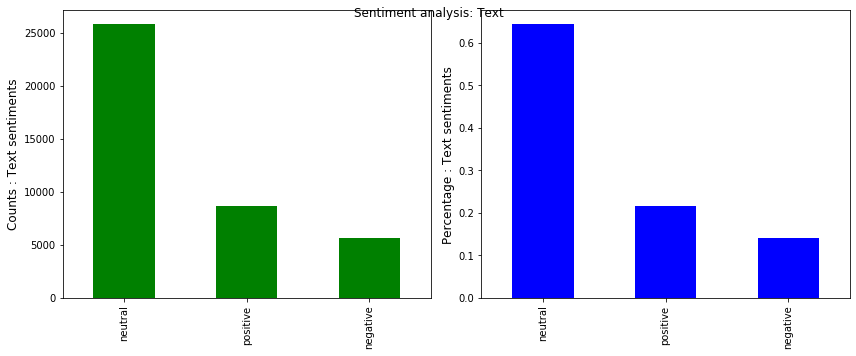

In [30]:
# used  AWD_LSTM model from fast ai and used transfer learning

plot_sentiment(df, 'sentiment', 'Text')

In [31]:
final_df=df.drop(columns=['user_description','user_created','user_followers','user_friends','user_favourites','user_verified','source'])

In [33]:

final_df[['text','sentiment']].head(20)

,text,sentiment
0,Same folks said daikon paste could treat a cyt...,negative
1,While the world has been on the wrong side of ...,positive
2,Russian vaccine is created to last 2-4 y...,neutral
3,"Facts are immutable, Senator, even when you're...",neutral
4,Explain to me again why we need a vaccine,neutral
5,Does anyone have any useful advice/guidance fo...,neutral
6,it is a bit sad to claim the fame for success ...,negative
7,There have not been many bright days in 2020 b...,positive
8,Covid vaccine; You getting it?\n\n,neutral
9,"\n\nStates will start getting Monday, says ...",neutral


## WordCloud 

In [35]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=50,
        max_font_size=40, 
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

In [36]:
from wordcloud import WordCloud, STOPWORDS
def show_wordcloud(data, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U","vaccine",'COVID19',"got","will",'covid','vacccines','dose'])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,background_color="white").generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

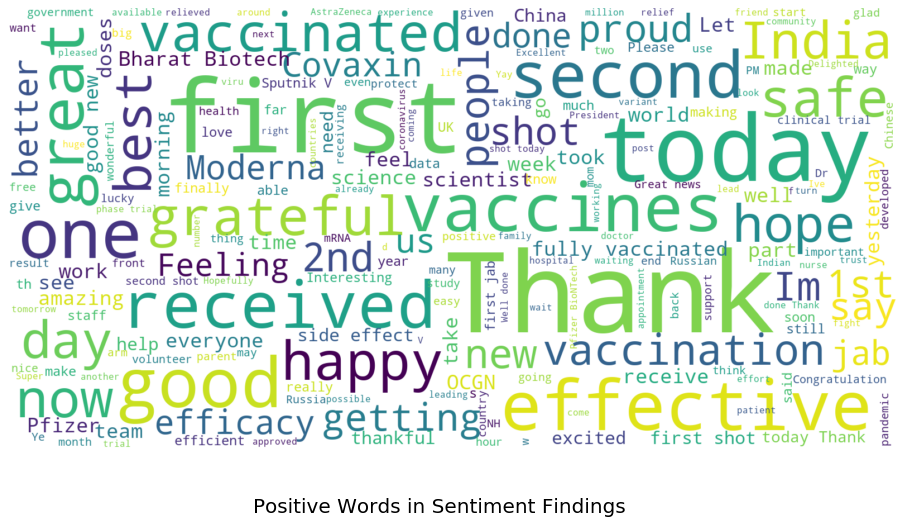

In [38]:
show_wordcloud(df.loc[df['sentiment']=='positive', 'text'], title = 'Positive Words in Sentiment Findings')

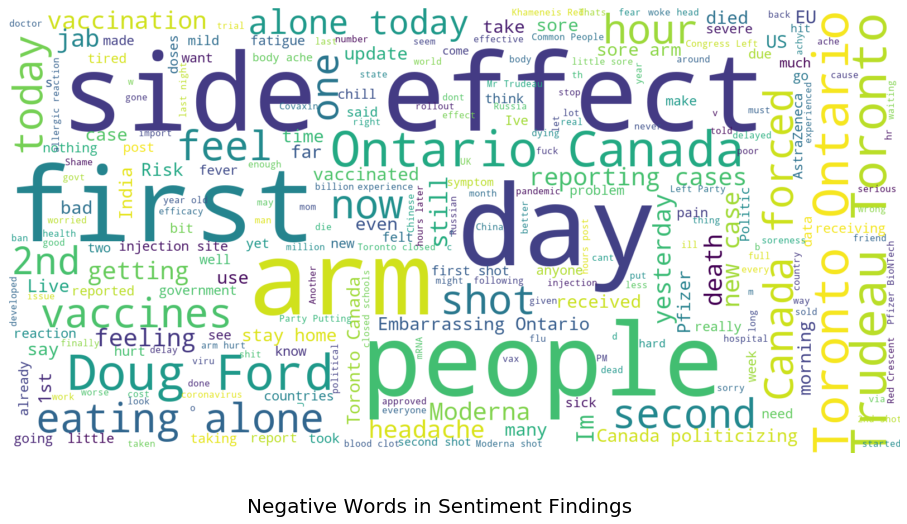

In [39]:
show_wordcloud(df.loc[df['sentiment']=='negative', 'text'], title = 'Negative Words in Sentiment Findings')

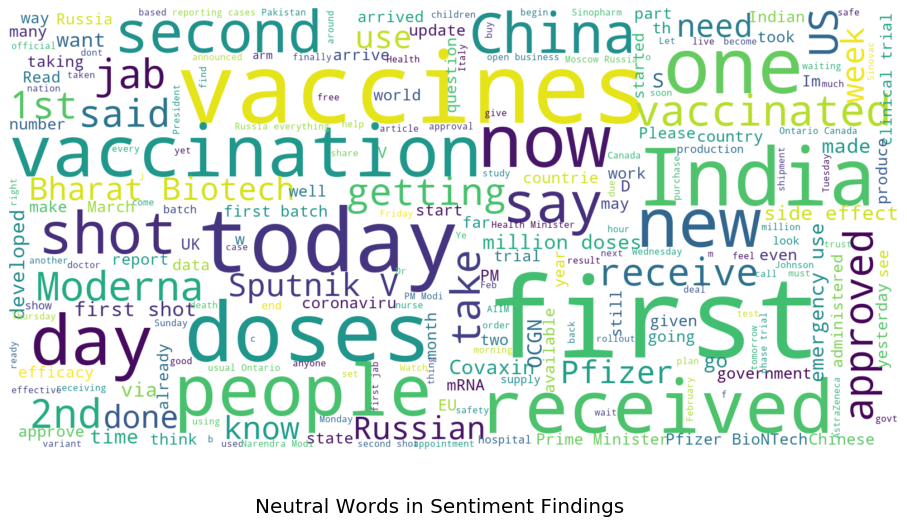

In [40]:
show_wordcloud(df.loc[df['sentiment']=='neutral', 'text'], title = 'Neutral Words in Sentiment Findings')

## Covaxin Plot 

In [78]:
import plotly.graph_objs as go 
import plotly.offline as pyo


all_vax = ['covaxin', 'sinopharm', 'sinovac', 'moderna', 'pfizer', 'biontech', 'oxford', 'astrazeneca', 'sputnik']

# Function to filter the data to a single vaccine and plot the timeline
# Note: a lot of the tweets seem to contain hashtags for multiple vaccines even though they are specifically referring to one vaccine - not very helpful!
def filtered_timeline(df, vax, title):
    df = df.dropna()
    df_filt = pd.DataFrame()
    for o in vax:
        df_filt = df_filt.append(df[df['orig_text'].str.lower().str.contains(o)])
    other_vax = list(set(all_vax)-set(vax))
    for o in other_vax:
        df_filt = df_filt[~df_filt['orig_text'].str.lower().str.contains(o)]
    df_filt = df_filt.drop_duplicates()
    
    return df_filt

covaxin = filtered_timeline(df, ['covaxin'], title='Covaxin')


covaxin_df = covaxin.groupby(['sentiment']).count()
covaxin_df=covaxin_df.drop(columns=['user_description','user_created','user_followers','user_friends','user_favourites','user_verified','source','user_name','id','user_location','date','text','hashtags','retweets','favorites','is_retweet','orig_text'])
covaxin_df


import plotly.express as px

fig = px.bar(covaxin_df, x='Unnamed: 0')
fig.show()




## Sinopharm Plot 

In [79]:
import plotly.graph_objs as go 
import plotly.offline as pyo


all_vax = ['covaxin', 'sinopharm', 'sinovac', 'moderna', 'pfizer', 'biontech', 'oxford', 'astrazeneca', 'sputnik']

# Function to filter the data to a single vaccine and plot the timeline
# Note: a lot of the tweets seem to contain hashtags for multiple vaccines even though they are specifically referring to one vaccine - not very helpful!
def filtered_timeline(df, vax, title):
    df = df.dropna()
    df_filt = pd.DataFrame()
    for o in vax:
        df_filt = df_filt.append(df[df['orig_text'].str.lower().str.contains(o)])
    other_vax = list(set(all_vax)-set(vax))
    for o in other_vax:
        df_filt = df_filt[~df_filt['orig_text'].str.lower().str.contains(o)]
    df_filt = df_filt.drop_duplicates()
    
    return df_filt

sinopharm = filtered_timeline(df, ['sinopharm'], title='sinopharm')


sinopharm_df = sinopharm.groupby(['sentiment']).count()
sinopharm_df=sinopharm_df.drop(columns=['user_description','user_created','user_followers','user_friends','user_favourites','user_verified','source','user_name','id','user_location','date','text','hashtags','retweets','favorites','is_retweet','orig_text'])



import plotly.express as px

fig = px.bar(sinopharm_df, x='Unnamed: 0')
fig.show()




In [ ]:
import plotly.graph_objs as go 
import plotly.offline as pyo


all_vax = ['covaxin', 'sinopharm', 'sinovac', 'moderna', 'pfizer', 'biontech', 'oxford', 'astrazeneca', 'sputnik']

# Function to filter the data to a single vaccine and plot the timeline
# Note: a lot of the tweets seem to contain hashtags for multiple vaccines even though they are specifically referring to one vaccine - not very helpful!
def filtered_timeline(df, vax, title):
    df = df.dropna()
    df_filt = pd.DataFrame()
    for o in vax:
        df_filt = df_filt.append(df[df['orig_text'].str.lower().str.contains(o)])
    other_vax = list(set(all_vax)-set(vax))
    for o in other_vax:
        df_filt = df_filt[~df_filt['orig_text'].str.lower().str.contains(o)]
    df_filt = df_filt.drop_duplicates()
    
    return df_filt

sinovac = filtered_timeline(df, ['sinovac'], title='sinopharm')


sinovac_df = sinopharm.groupby(['sentiment']).count()
sinopharm_df=sinopharm_df.drop(columns=['user_description','user_created','user_followers','user_friends','user_favourites','user_verified','source','user_name','id','user_location','date','text','hashtags','retweets','favorites','is_retweet','orig_text'])



import plotly.express as px

fig = px.bar(sinopharm_df, x='Unnamed: 0')
fig.show()


